<a href="https://colab.research.google.com/github/tejasmanchi/ML-mini-projects/blob/main/Load_Default_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [144]:
df1=pd.read_csv('/content/drive/MyDrive/DS/ML Datasets/Loan Default Pred/Train_Dataset.csv')

<ipython-input-144-1aeb7aaba82e>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('/content/drive/MyDrive/DS/ML Datasets/Loan Default Pred/Train_Dataset.csv')


In [6]:
data_dic=pd.read_csv('/content/drive/MyDrive/DS/ML Datasets/Loan Default Pred/Data_Dictionary.csv')

In [118]:
data_dic_style=data_dic.style.set_properties(subset=['Description'], **{'max-width': '700px'})
data_dic_style

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


#Cleaning Data

In [145]:
drop_cols=['ID','Application_Process_Day','Application_Process_Hour']

In [146]:
df1.drop(columns=drop_cols,axis=1,inplace=True)

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [148]:
df1['Score_Source_3']=df1['Score_Source_3'].str.replace('&','').replace('',np.nan)

In [149]:
df1['Score_Source_3']=df1['Score_Source_3'].astype(float)

In [150]:
df1['Client_Income']=df1['Client_Income'].str.replace('$','').replace('',np.nan)
df1['Client_Income']=df1['Client_Income'].astype(float)

<ipython-input-150-7ba0150eba84>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Client_Income']=df1['Client_Income'].str.replace('$','').replace('',np.nan)


In [151]:
df1['Credit_Amount']=df1['Credit_Amount'].str.replace('$','').replace('',np.nan)
df1['Credit_Amount']=df1['Credit_Amount'].astype(float)

<ipython-input-151-120e4cf458a2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Credit_Amount']=df1['Credit_Amount'].str.replace('$','').replace('',np.nan)


In [152]:
df1['Loan_Annuity']=df1['Loan_Annuity'].str.replace('#VALUE!','').replace('',np.nan)
df1['Loan_Annuity']=df1['Loan_Annuity'].str.replace('$','').replace('',np.nan)
df1['Loan_Annuity']=df1['Loan_Annuity'].astype(float)

<ipython-input-152-0ed8f5676286>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Loan_Annuity']=df1['Loan_Annuity'].str.replace('$','').replace('',np.nan)


In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               102336 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               38718 non-null   float64
 7   Loan_Annuity                94358 non-null   float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

#Pre-processing

In [154]:
for col in df1:
  if df1[col].dtype in [int,float]:
    mean_val = df1[col].mean()
    df1[col].fillna(mean_val,inplace=True)
df1

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.000000,0.00000,0.0,61190.55,3416.850000,Alone,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,0.513171,0.018600,63.000000,1.891082,0
1,20250.0,1.0,0.0,1.000000,0.69206,0.0,15282.00,1826.550000,Alone,Service,...,Yes,Yes,Government,0.563360,0.215068,0.513171,0.117428,962.106056,1.891082,0
2,18000.0,0.0,0.0,1.000000,0.00000,1.0,59527.35,2788.200000,Alone,Service,...,Yes,Yes,Self-employed,0.501213,0.552795,0.513171,0.074200,277.000000,0.000000,0
3,15750.0,0.0,0.0,1.000000,1.00000,0.0,53870.40,2295.450000,Alone,Retired,...,Yes,Yes,XNA,0.501213,0.135182,0.513171,0.117428,1700.000000,3.000000,0
4,33750.0,1.0,0.0,1.000000,0.00000,2.0,133988.40,3547.350000,Alone,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.513171,0.202100,674.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250.0,0.0,0.0,0.499175,1.00000,0.0,107820.00,2722.188351,Relative,Service,...,Yes,No,Business Entity Type 2,0.501213,0.173527,0.513171,0.057700,0.000000,1.000000,1
121852,15750.0,0.0,1.0,1.000000,0.00000,0.0,104256.00,2722.188351,Alone,Commercial,...,Yes,Yes,Self-employed,0.501213,0.371559,0.513171,0.082500,4.000000,0.000000,0
121853,8100.0,0.0,1.0,0.000000,1.00000,1.0,55107.90,2722.188351,Alone,Govt Job,...,No,No,Trade: type 6,0.169049,0.048079,0.513171,0.117428,0.000000,1.891082,0
121854,38250.0,1.0,1.0,0.000000,1.00000,0.0,45000.00,2722.188351,Alone,Service,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.513171,0.097900,0.000000,2.000000,0


<Axes: ylabel='Default'>

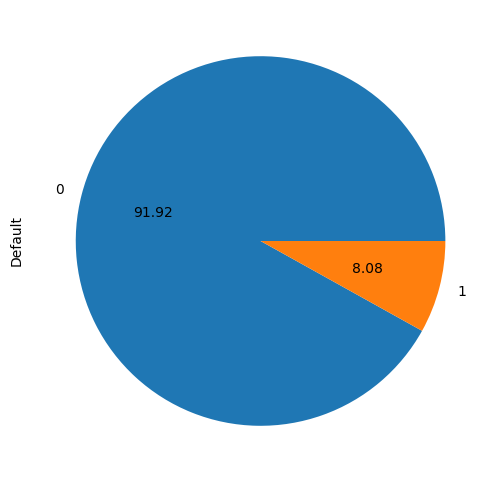

In [113]:
df1['Default'].value_counts().plot.pie(autopct='%.2f',figsize=(6,6))

We imputed the values we can i.e(int and float). 
Yet to learn string imputation ..so we are dropping all the empty string values

In [155]:
df1.dropna(inplace=True)

In [134]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [156]:
for col in df1:
  if df1[col].dtype in [object,'category']:
    df1[col]=enc.fit_transform(df1[col].astype(str).values.reshape(-1,1))
  else:
    continue

In [187]:
newdf=df1
newdf

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.000000,0.0,0.0,61190.55,3416.850000,1.0,1.0,...,1.0,1.0,42.0,0.568066,0.478787,0.513171,0.018600,63.0,1.891082,0
4,33750.0,1.0,0.0,1.000000,0.0,2.0,133988.40,3547.350000,1.0,1.0,...,1.0,1.0,5.0,0.508199,0.301182,0.513171,0.202100,674.0,1.000000,0
5,11250.0,0.0,1.0,1.000000,1.0,1.0,13752.00,653.850000,1.0,4.0,...,1.0,1.0,33.0,0.501213,0.697928,0.513171,0.063900,739.0,0.000000,0
10,27000.0,0.0,0.0,1.000000,1.0,1.0,67500.00,3375.000000,1.0,2.0,...,1.0,1.0,11.0,0.715451,0.770343,0.513171,0.117428,1799.0,1.000000,0
11,15750.0,0.0,0.0,0.000000,0.0,1.0,149963.85,4397.850000,1.0,4.0,...,1.0,1.0,42.0,0.435028,0.564752,0.513171,0.573200,1333.0,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250.0,0.0,0.0,0.499175,1.0,0.0,107820.00,2722.188351,6.0,4.0,...,1.0,0.0,4.0,0.501213,0.173527,0.513171,0.057700,0.0,1.000000,1
121852,15750.0,0.0,1.0,1.000000,0.0,0.0,104256.00,2722.188351,1.0,1.0,...,1.0,1.0,42.0,0.501213,0.371559,0.513171,0.082500,4.0,0.000000,0
121853,8100.0,0.0,1.0,0.000000,1.0,1.0,55107.90,2722.188351,1.0,2.0,...,0.0,0.0,50.0,0.169049,0.048079,0.513171,0.117428,0.0,1.891082,0
121854,38250.0,1.0,1.0,0.000000,1.0,0.0,45000.00,2722.188351,1.0,4.0,...,1.0,1.0,5.0,0.182737,0.103538,0.513171,0.097900,0.0,2.000000,0


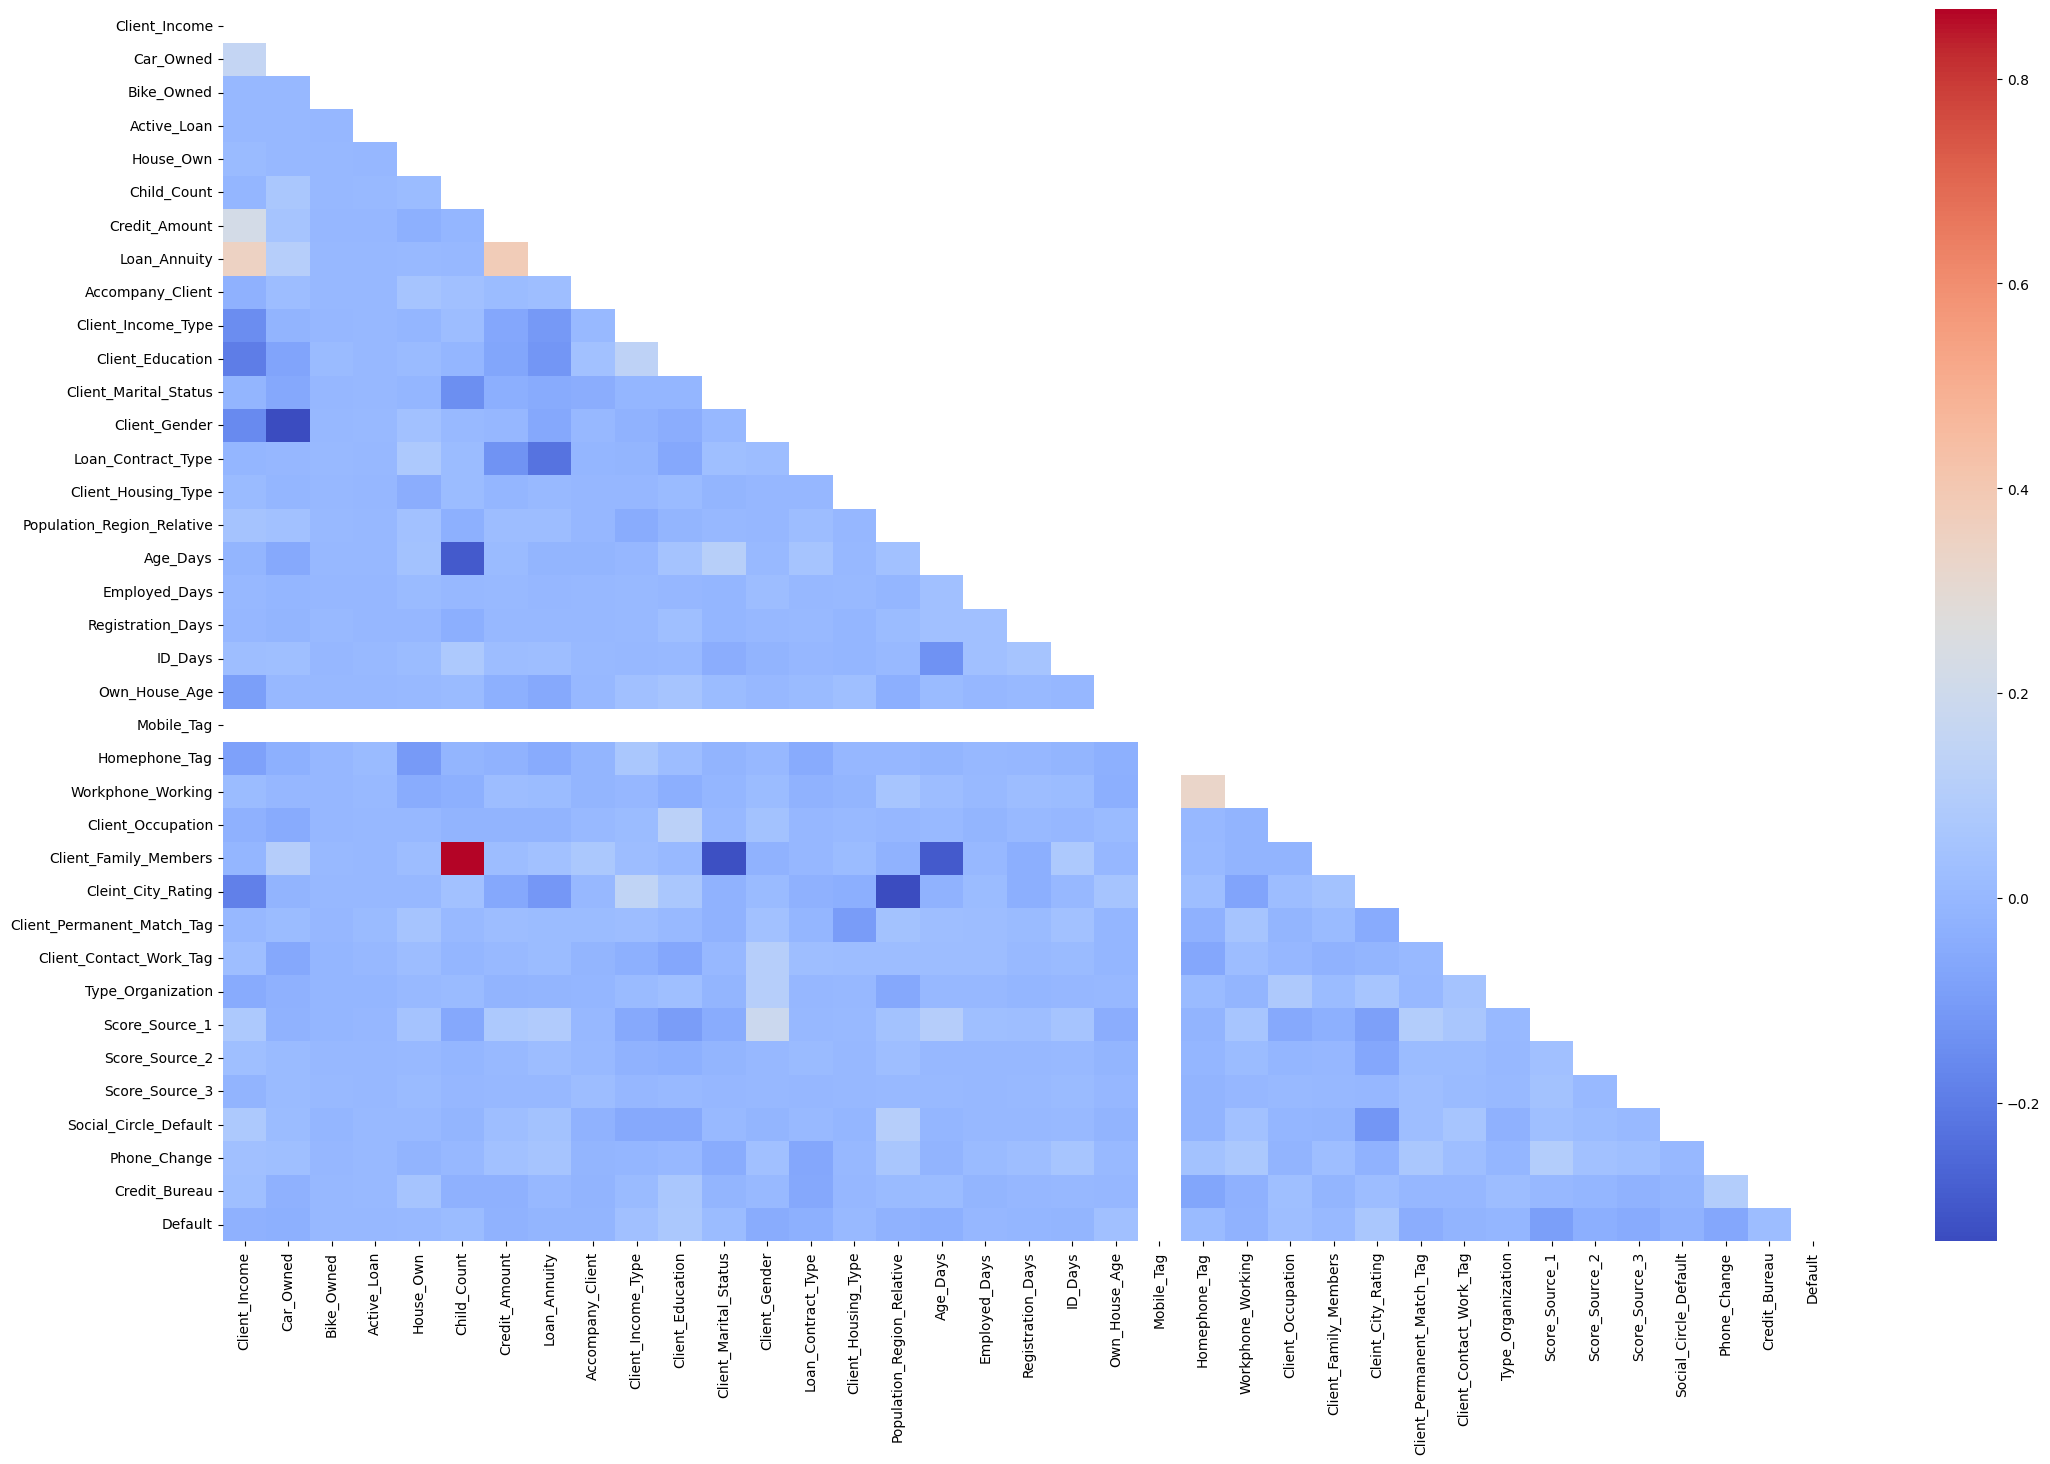

In [182]:
plt.figure(figsize=(26,16))
corr=newdf.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,cmap='coolwarm')
plt.show()

#Building Models

In [195]:
x=newdf.drop('Default',axis=1)
y=newdf['Default']

In [196]:
x.shape,len(y)

((54025, 36), 54025)

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37817, 36), (16208, 36), (37817,), (16208,))

RandomOverSampler . Since the defaulted class in very low in count

In [212]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy='minority' , random_state=42)
x_train_resampled,y_train_resampled = ros.fit_resample(x_train,y_train)

In [213]:
x_train_resampled.shape,x_test.shape,y_train_resampled.shape,y_test.shape

((69012, 36), (16208, 36), (69012,), (16208,))

In [214]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_trans=ss.fit_transform(x_train_resampled)
x_test_trans=ss.fit_transform(x_test)

In [215]:
x_train_trans.shape,x_test_trans.shape,y_train_resampled.shape,y_test.shape

((69012, 36), (16208, 36), (69012,), (16208,))

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [260]:
dt = DecisionTreeClassifier(criterion='gini',random_state=42)
rfc = RandomForestClassifier(n_estimators=200)
adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),n_estimators=200)
grb = GradientBoostingClassifier(loss='deviance',n_estimators=100)
bgc = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),n_estimators=200)
etc = ExtraTreesClassifier(n_estimators=300)
knn = KNeighborsClassifier(n_neighbors=20)
xgb = XGBClassifier(n_estimators=100,max_depth=6, learning_rate=0.3, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', random_state=42)
cbc = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.3, l2_leaf_reg=3, random_state=42)

XGBOOST

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     14803
           1       0.16      0.40      0.23      1405

    accuracy                           0.77     16208
   macro avg       0.55      0.60      0.55     16208
weighted avg       0.87      0.77      0.81     16208



<Axes: >

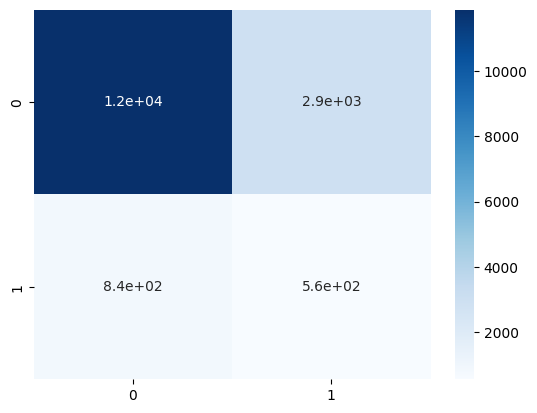

In [252]:
from sklearn.metrics import classification_report,confusion_matrix
xgb.fit(x_train_trans,y_train_resampled)
y_pred=xgb.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

RANDOMFORESTCLASSIFIER

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14803
           1       0.94      0.06      0.11      1405

    accuracy                           0.92     16208
   macro avg       0.93      0.53      0.53     16208
weighted avg       0.92      0.92      0.88     16208



<Axes: >

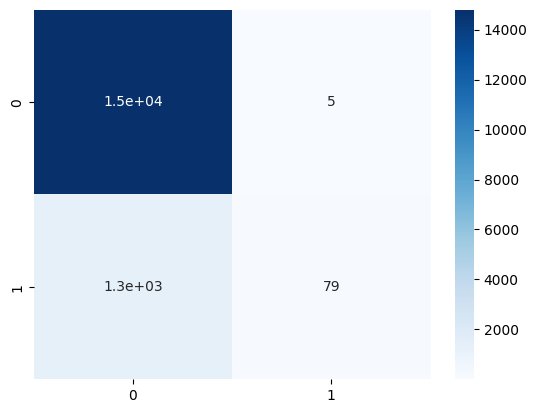

In [253]:
rfc.fit(x_train_trans,y_train_resampled)
y_pred=rfc.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

ADABOOST

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14803
           1       0.17      0.09      0.11      1405

    accuracy                           0.88     16208
   macro avg       0.54      0.52      0.53     16208
weighted avg       0.85      0.88      0.87     16208



<Axes: >

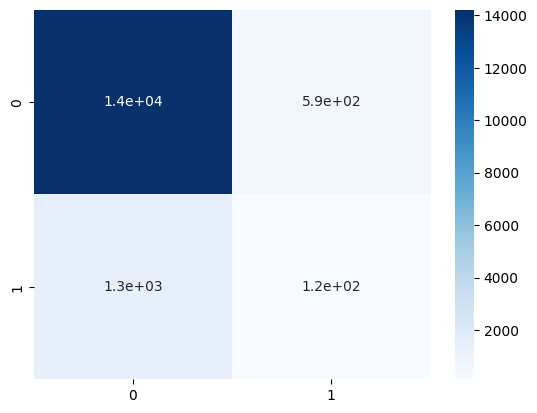

In [254]:
adb.fit(x_train_trans,y_train_resampled)
y_pred=adb.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

BAGGING

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.57      0.71     14803
           1       0.13      0.71      0.23      1405

    accuracy                           0.58     16208
   macro avg       0.54      0.64      0.47     16208
weighted avg       0.88      0.58      0.67     16208



<Axes: >

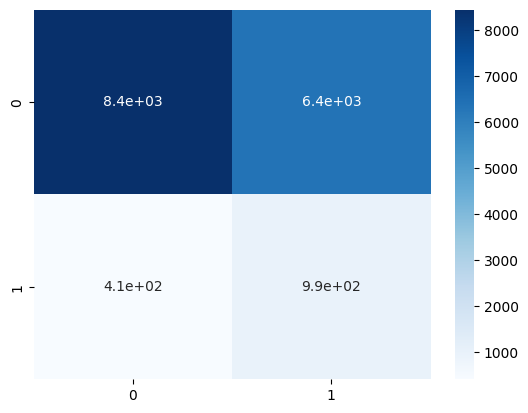

In [255]:
bgc.fit(x_train_trans,y_train_resampled)
y_pred=bgc.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

CATBOOST

0:	learn: 0.6515268	total: 96.8ms	remaining: 9.58s
1:	learn: 0.6202701	total: 196ms	remaining: 9.59s
2:	learn: 0.5981037	total: 290ms	remaining: 9.36s
3:	learn: 0.5840256	total: 394ms	remaining: 9.46s
4:	learn: 0.5676106	total: 489ms	remaining: 9.3s
5:	learn: 0.5522342	total: 586ms	remaining: 9.17s
6:	learn: 0.5381165	total: 683ms	remaining: 9.07s
7:	learn: 0.5324289	total: 777ms	remaining: 8.93s
8:	learn: 0.5180322	total: 908ms	remaining: 9.18s
9:	learn: 0.5054055	total: 1s	remaining: 9.02s
10:	learn: 0.4911481	total: 1.1s	remaining: 8.93s
11:	learn: 0.4782525	total: 1.22s	remaining: 8.91s
12:	learn: 0.4689216	total: 1.31s	remaining: 8.76s
13:	learn: 0.4594953	total: 1.41s	remaining: 8.66s
14:	learn: 0.4486247	total: 1.51s	remaining: 8.55s
15:	learn: 0.4324889	total: 1.61s	remaining: 8.45s
16:	learn: 0.4273077	total: 1.7s	remaining: 8.32s
17:	learn: 0.4182416	total: 1.8s	remaining: 8.22s
18:	learn: 0.4084563	total: 1.92s	remaining: 8.19s
19:	learn: 0.4030223	total: 2.03s	remaining: 8.

<Axes: >

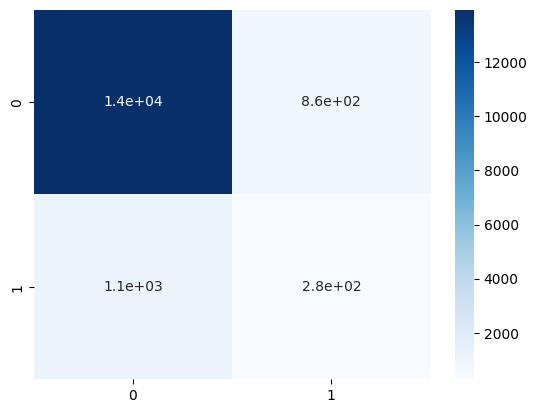

In [261]:
cbc.fit(x_train_trans,y_train_resampled)
y_pred=cbc.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

KNN

              precision    recall  f1-score   support

           0       0.93      0.60      0.73     14803
           1       0.11      0.53      0.18      1405

    accuracy                           0.60     16208
   macro avg       0.52      0.57      0.46     16208
weighted avg       0.86      0.60      0.68     16208



<Axes: >

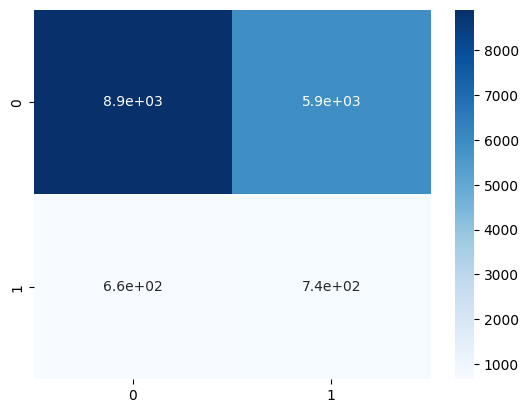

In [257]:
knn.fit(x_train_trans,y_train_resampled)
y_pred=knn.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

ETC

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14803
           1       1.00      0.06      0.12      1405

    accuracy                           0.92     16208
   macro avg       0.96      0.53      0.54     16208
weighted avg       0.93      0.92      0.88     16208



<Axes: >

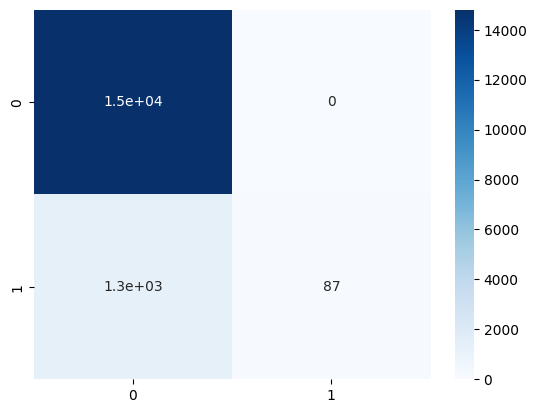

In [262]:
etc.fit(x_train_trans,y_train_resampled)
y_pred=etc.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

GRADIENTBOOST

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.58      0.72     14803
           1       0.14      0.71      0.23      1405

    accuracy                           0.59     16208
   macro avg       0.55      0.65      0.48     16208
weighted avg       0.88      0.59      0.68     16208



<Axes: >

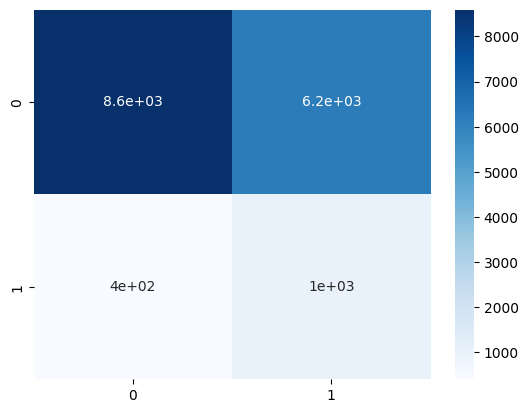

In [259]:
grb.fit(x_train_trans,y_train_resampled)
y_pred=grb.predict(x_test_trans)
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

Since ETC is performing better than every other classifier .. we will try to hyperparamter tune it for increasing recall score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14803
           1       1.00      0.06      0.12      1405

    accuracy                           0.92     16208
   macro avg       0.96      0.53      0.54     16208
weighted avg       0.93      0.92      0.88     16208



<Axes: >

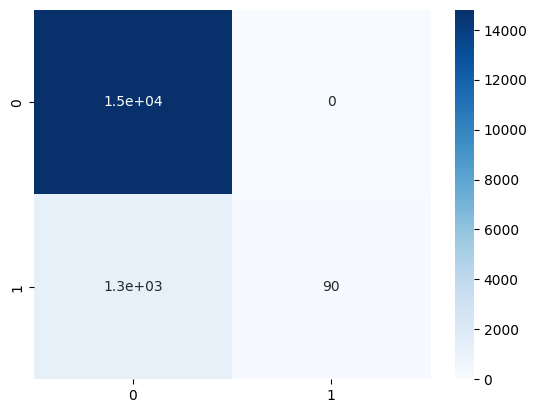

In [267]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
param_grid={
    'n_estimators':[100,200,300],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,5,10]
}
grid_search=GridSearchCV(etc,param_grid,scoring='precision',cv=4)
grid_search.fit(x_train_trans,y_train_resampled)

best_model=grid_search.best_estimator_
best_params=grid_search.best_params_

best_model.fit(x_train_trans,y_train_resampled)
y_pred=best_model.predict(x_test_trans)

cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
'''